## Geocarta

There is a

![](geocarta.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import ert
# %matplotlib notebook

In [2]:
data = ert.DataContainer()
aVec = [1, 0.5, 1, 1.8]
xVec = [0, 0.5, 1, 2]
for x, a in zip(xVec, aVec):
    data.createSensor([x, -a/2, 0])
    data.createSensor([x, a/2, 0])
for i in range(len(xVec)-1):    
    data.createFourPointData(i, 0, 1, i*2+2, i*2+3)

data['k'] = ert.geometricFactor(data, dim=3)
print(data)
print(np.column_stack([pg.x(data), pg.y(data)]))
print(np.column_stack([data[t] for t in "abmn"]))

Data: Sensors: 8 data: 3, nonzero entries: ['a', 'b', 'k', 'm', 'n', 'valid']
[[ 0.   -0.5 ]
 [ 0.    0.5 ]
 [ 0.5  -0.25]
 [ 0.5   0.25]
 [ 1.   -0.5 ]
 [ 1.    0.5 ]
 [ 2.   -0.9 ]
 [ 2.    0.9 ]]
[[0 1 2 3]
 [0 1 4 5]
 [0 1 6 7]]


The 1D sensitivity function for a pole-pole measurement is (Günther, 2004)
$$ s(z) = \frac{z}{\sqrt{a^2+z^2}^3} $$
and therefore for a four-electrode array
$$ s(z) = \frac{z}{\sqrt{AM^2+z^2}^3} - \frac{z}{\sqrt{BM^2+z^2}^3} - \frac{z}{\sqrt{AN^2+z^2}^3} + \frac{z}{\sqrt{BN^2+z^2}^3} $$
We compute this and obtain the same results as Lück & Rühlmann (2013, Fig. 2):

In [3]:
xe = pg.x(data)
ye = pg.y(data)
z = np.arange(0, 3.0, 0.02)
am = np.sqrt((xe[data["a"]]-xe[data["m"]])**2+(ye[data["a"]]-ye[data["m"]])**2)
an = np.sqrt((xe[data["a"]]-xe[data["n"]])**2+(ye[data["a"]]-ye[data["n"]])**2)
bm = np.sqrt((xe[data["b"]]-xe[data["m"]])**2+(ye[data["b"]]-ye[data["m"]])**2)
bn = np.sqrt((xe[data["b"]]-xe[data["n"]])**2+(ye[data["b"]]-ye[data["n"]])**2)

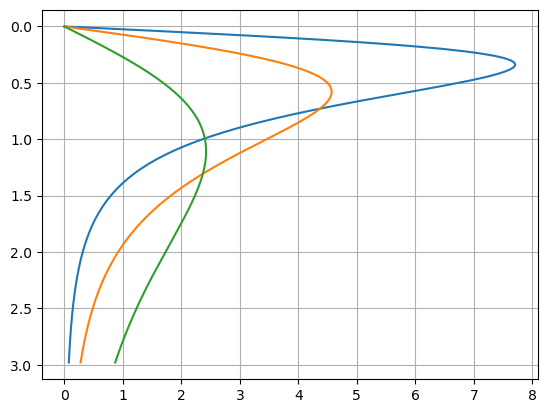

In [4]:
fig, ax = plt.subplots()
for i in range(len(am)):
    s = z * (1 / np.sqrt(am[i]**2+z**2)**3 - 1 / np.sqrt(bm[i]**2+z**2)**3 - 
             1 / np.sqrt(an[i]**2+z**2)**3 + 1 / np.sqrt(bn[i]**2+z**2)**3) * data['k'][i]
    ax.plot(s, z)
    # plt.plot(s/max(s), z)
    # print("AM={:.1f}, zMax={:.2f}".format(am[i], z[np.argmax(s)]))
    
plt.gca().invert_yaxis()
plt.grid()